<a href="https://www.kaggle.com/code/heemalichaudhari/gender-classification?scriptVersionId=116418665" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()

# Importing data

In [2]:
data = pd.read_csv('/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [4]:
data.shape

(66, 5)

In [5]:
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [6]:
from sklearn.preprocessing import LabelEncoder

data1 = data.copy(deep = True)
le_color = LabelEncoder()
data1['Favorite Color'] = le_color.fit_transform(data['Favorite Color'])

le_genre = LabelEncoder()
data1['Favorite Music Genre'] = le_genre.fit_transform(data['Favorite Music Genre'])


le_beverage = LabelEncoder()
data1['Favorite Beverage'] = le_beverage.fit_transform(data['Favorite Beverage'])


le_drink = LabelEncoder()
data1['Favorite Soft Drink'] = le_drink.fit_transform(data['Favorite Soft Drink'])


le_gender = LabelEncoder()
data1['Gender'] = le_gender.fit_transform(data['Gender'])

In [7]:
data1.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


In [8]:
X = data1.drop(['Gender'], axis = 1)
y = data1.Gender

# Model

In [9]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

In [10]:
clf.score(X, y)

0.7878787878787878

# Visualization with tree.plot_tree

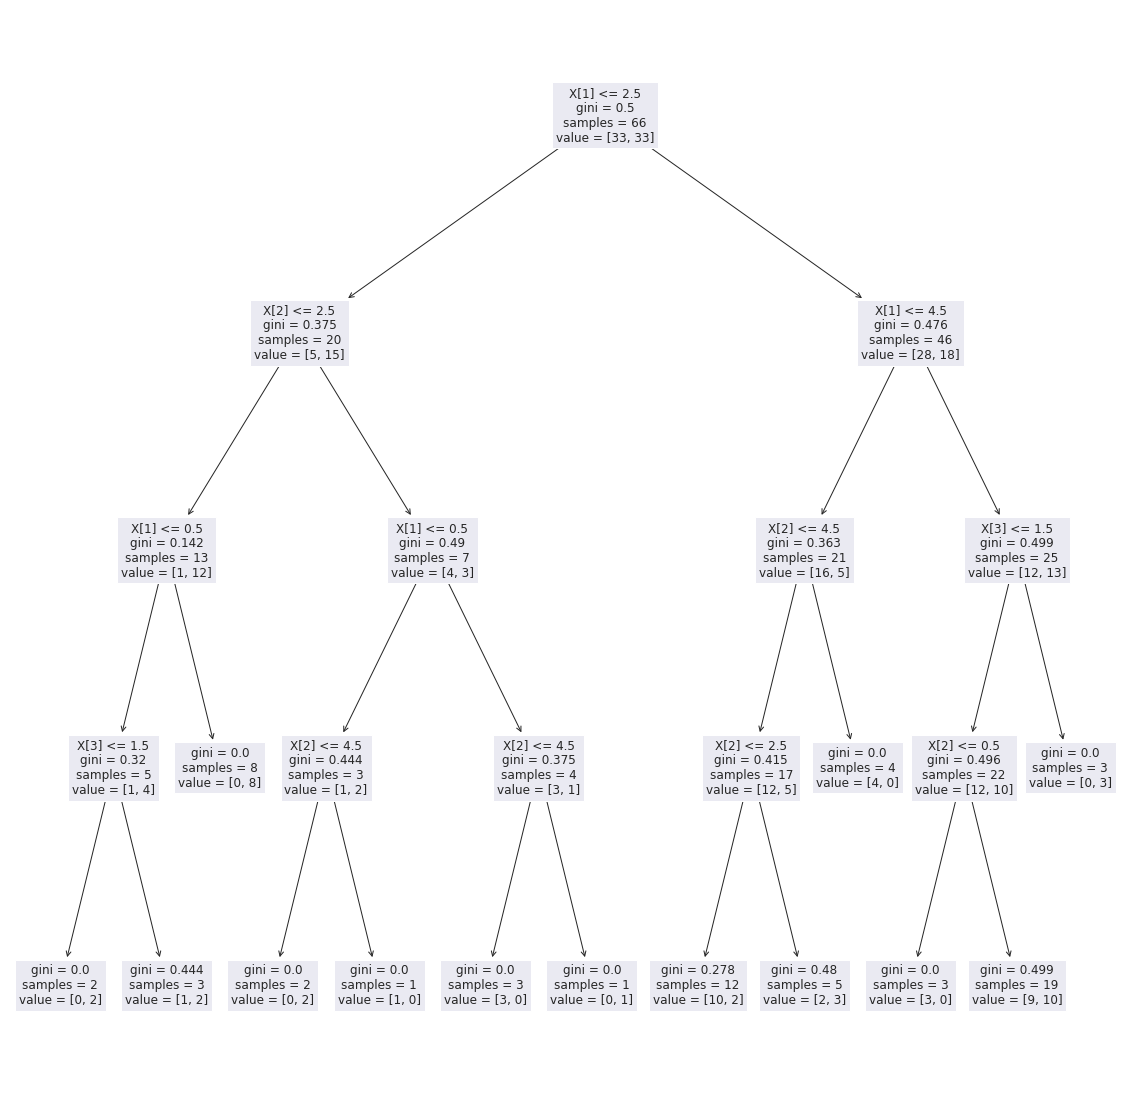

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
_ = tree.plot_tree(clf.fit(X, y))

# With GraphViz

In [12]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=data1.drop(['Gender'],axis=1).columns, filled=True) 
graph = graphviz.Source(dot_data)

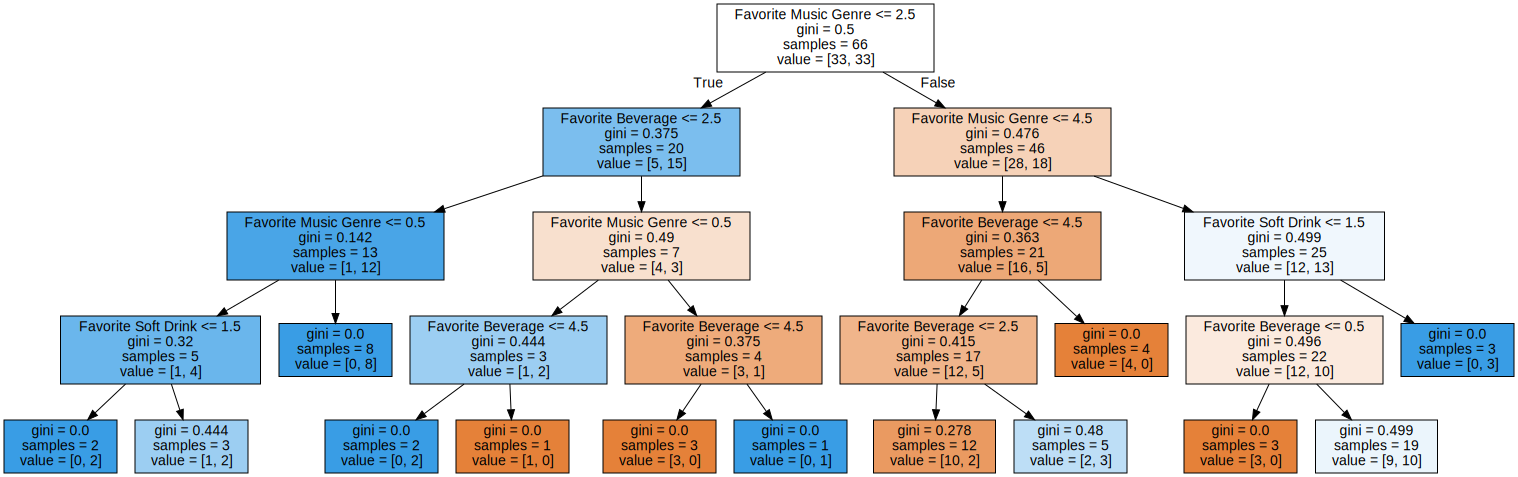

In [13]:
graph

# Hyper Parameter Tuning

In [14]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=6)
clf = clf.fit(X, y)

In [15]:
clf.score(X, y)

0.7575757575757576

In [16]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=data1.drop(['Gender'],axis=1).columns, filled=True) 
graph = graphviz.Source(dot_data)

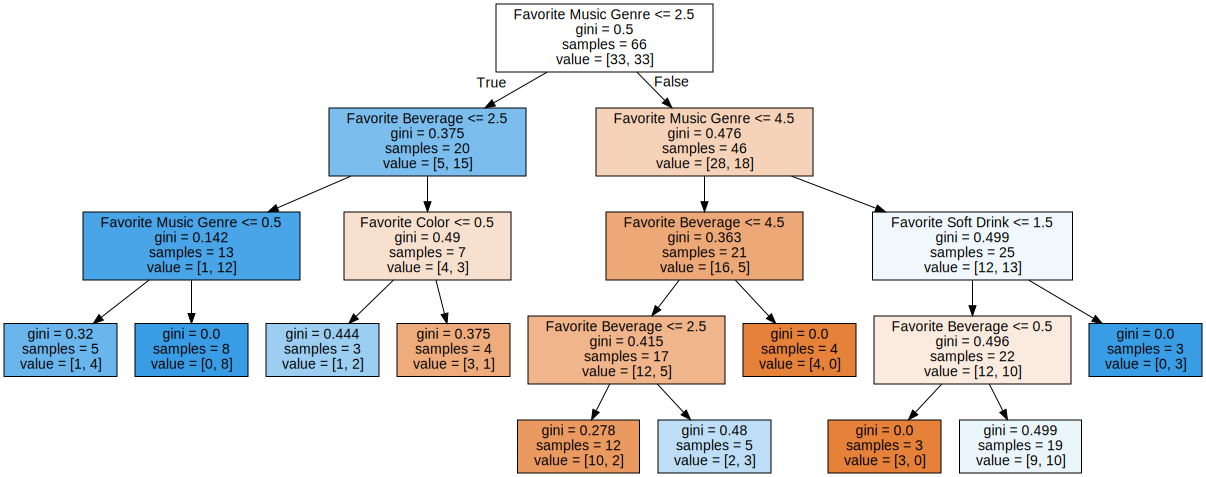

In [17]:
graph

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=6, min_samples_leaf=5)
clf = clf.fit(X, y)

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=data1.drop(['Gender'],axis=1).columns, filled=True) 
graph = graphviz.Source(dot_data)

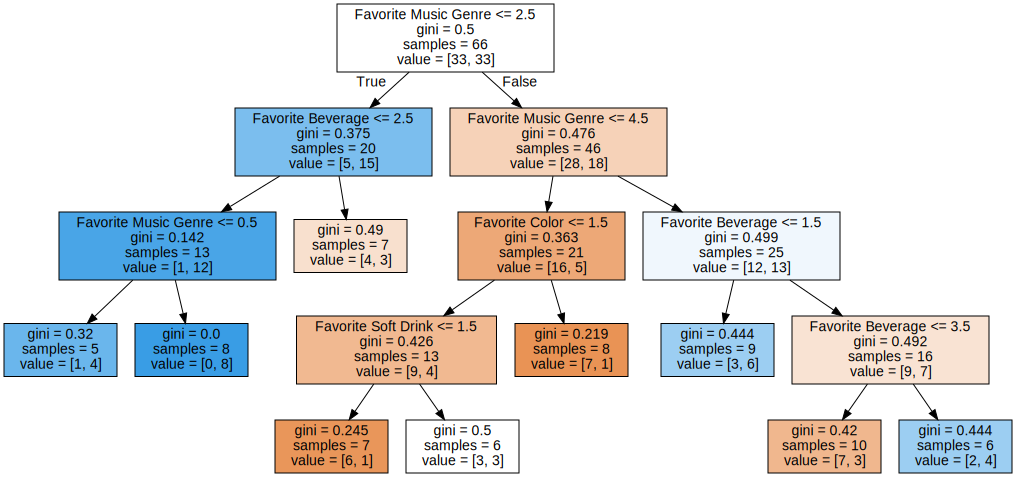

In [20]:
graph